In [2]:
# standard python imports
import numpy as np
import matplotlib.pyplot as plt

import tidy3d as td
from tidy3d import web

In [3]:
# The setup of the 1D simulation:8

# |     |          |        |            |         |            |     |
# |`PML`|   dPML   |`source`|  distance  |`monitor`|  distance  |`PML`|
# |     |          |        |            |         |            |     |

# Number of PML layers
Npml = 2 # the default number of layers is 12

# sufficiently large distance between the source and the time monitor
distance = 100 #um
# distance between the source and PML
dPML = 1 #um

# Wavelength and frequency range of the source
freq0 = 300e12 #Hz, central frequency
fwidth = freq0/5 #frequency pulse width
lambda0 = td.C_0 / freq0

# resolution
resolution = 20
dl = lambda0/resolution

# runtime
t_stop = 5e-12

# simulation domain size
sim_size = Lx, Ly, Lz = (dl, dl, 2*distance+dPML)

In [5]:
# Uniform grid
grid_spec = td.GridSpec.uniform(dl=dl)

# Planewave source
src_z = dPML - Lz/2
source = td.PlaneWave(
    center=(0,0,src_z),
    size=(td.inf, td.inf, 0),
    source_time = td.GaussianPulse(
        freq0=freq0,
        fwidth=fwidth,
    ),
    direction='+',
    name='Gaussian pulse',
)

# Time monitor at a single point
tmnt_pt = td.FieldTimeMonitor(
    center=(0, 0, src_z + distance),
    name='time',
    size=(0, 0, 0),
)

# PML boundary
pml = td.Boundary.pml(num_layers=Npml)
bspec = td.BoundarySpec(x=td.Boundary.periodic(), y = td.Boundary.periodic(), z=pml)

In [6]:
sim = td.Simulation(
    center = (0, 0, 0),
    size = sim_size,
    grid_spec = grid_spec,
    structures = [],
    sources = [source],
    monitors = [tmnt_pt],
    run_time = t_stop,
    boundary_spec = bspec,
    shutoff = 0,
)

In [7]:
sim_data = web.run(sim, task_name='lecture06_pml_reflection', path=f'data/data_pml_reflection.hdf5')

[15:45:53] Created task 'lecture06_pml_reflection' with task_id                                       ]8;id=110002;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=615844;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#189\189]8;;\
           'fdve-935a6f2f-f463-47b0-918d-2bb252e930e5v1'.                                                          

           View task using web UI at                                                                  ]8;id=512141;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=310017;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#191\191]8;;\
           ]8;id=255028;https://tidy3d.simulation.cloud/workbench?taskId=fdve-935a6f2f-f463-47b0-918d-2bb252e930e5v1\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=178280;https://tidy3d.simulation.cloud/workbench?taskId=fdve-935a6f2f-f463-47b0-918d-2bb252e930e5v1\taskId]8;;\]8;id=255028;https://tidy3d.simulation.cloud/workbench?taskId=fdve-935a6f2f-f463-47b0-918d-2bb252e930e5v1\=]8;;\]8;id=895762;https://tidy3d.simulation.cloud/workbench?taskId=fdve-935a6f2f-f463-47b0-918d-2bb252e930e5v1\fdve]8;;\]8;id=255028;https://tidy3d.simulation.cloud/workbench?taskId=fdve-935a6f2f-f463-47b0-918d-2bb252e930e5v1\-935a6f2f-f463-47b0-918d-2bb252e930e]8;;\              
           ]8;id=255028;https://tidy3d.simulation.cloud/workbench?taskId=fdve-935a6f2f-f463-47b0-918d-2bb252e930e5v1\5v1']8;;\.                                                                                                   

Output()

[15:45:56] status = queued                                                                            ]8;id=731977;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=535501;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#363\363]8;;\

Output()

[15:45:59] status = preprocess                                                                        ]8;id=68634;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=248620;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#357\357]8;;\

[15:46:04] Maximum FlexCredit cost: 0.025. Use 'web.real_cost(task_id)' to get the billed FlexCredit  ]8;id=859920;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=28128;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#343\343]8;;\
           cost after a simulation run.                                                                            

           starting up solver                                                                         ]8;id=502556;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=347229;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#379\379]8;;\

[15:46:05] running solver                                                                             ]8;id=798167;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=947575;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#389\389]8;;\

           To cancel the simulation, use 'web.delete(task_id)' or delete the task in the web UI.      ]8;id=26;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=834783;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#390\390]8;;\
           Terminating the Python script will not stop the job running on the cloud.                               

Output()

[15:46:14] status = postprocess                                                                       ]8;id=618359;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=488746;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#424\424]8;;\

Output()

[15:46:18] status = success                                                                           ]8;id=520339;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=523955;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#431\431]8;;\

Output()

[15:46:22] loading SimulationData from data/data_pml_reflection.hdf5                                  ]8;id=246845;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=657193;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#609\609]8;;\

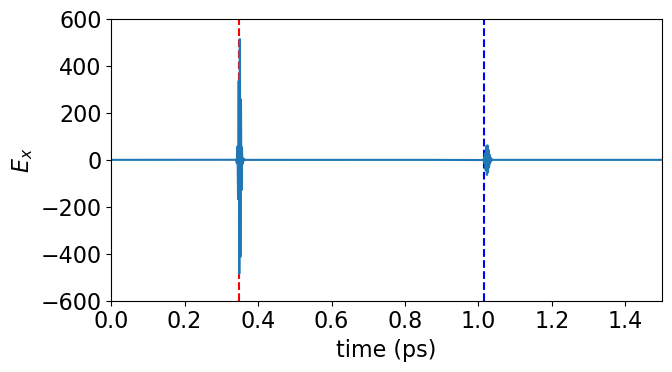

In [8]:
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(1,figsize=(7,4), tight_layout=True)

speed = td.C_0
time_reach_monitor = source.source_time.offset/fwidth/2/np.pi + distance/speed
time_reflection = time_reach_monitor + 2*distance/speed
ax.vlines(time_reach_monitor*1e12,-600,600,colors='r',linestyle='dashed')
ax.vlines(time_reflection*1e12,-600,600,colors='b',linestyle='dashed')

time_data = sim_data['time']
Ex = time_data.Ex
Ex_values = np.squeeze(Ex.values)

ax.plot(Ex.t*1e12,Ex_values)
ax.set_xlabel('time (ps)')
ax.set_ylabel('$E_x$')
ax.set_xlim(0,1.5)
ax.set_ylim(-600,600)
plt.show()

In [9]:
# First, let's select two time intervals of equal length. The first interval
# completely contains the original incident pulse, and the second interval
# completely contains the reflected pulse. We take the former to
# be [0,time_reach_PML), and the latter to be [time_reach_PML,2*time_reach_PML)

time_reach_PML = source.source_time.offset/fwidth/2/np.pi + 2* distance/speed
inds = np.argwhere(np.array(Ex.t)>=time_reach_PML)
Nt = int(inds[0])

C:\Users\oarisev\AppData\Local\Temp\ipykernel_2224\886578433.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Nt = int(inds[0])


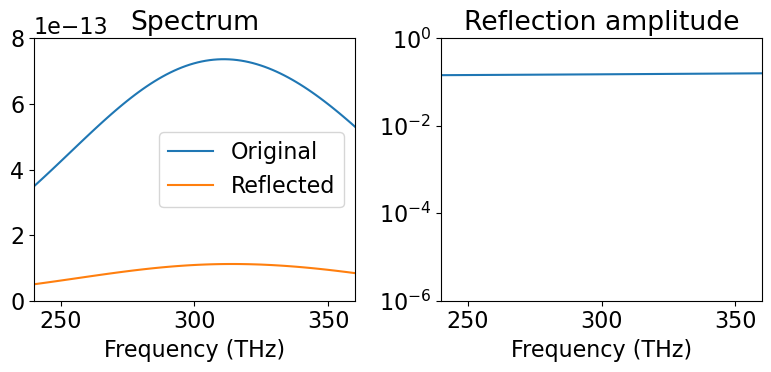

In [10]:
# Now let's perform FFT in each interval, and visualize the spectrum
dt = sim.dt
df = 1/Nt/dt
fmesh = np.arange(0, Nt)*df

# original pulse
spectrum_original = 1/np.sqrt(2*np.pi)*np.fft.ifft(np.fft.ifftshift(Ex_values[:Nt]))/df
#reflected pulse
spectrum_reflection = 1/np.sqrt(2*np.pi)*np.fft.ifft(np.fft.ifftshift(Ex_values[Nt:Nt*2]))/df

# visualization of each spectrum
fig, ax = plt.subplots(1,2,figsize=(8,4), tight_layout=True)
ax[0].plot(fmesh/1e12, np.abs(spectrum_original),label='Original')
ax[0].plot(fmesh/1e12, np.abs(spectrum_reflection),label='Reflected')
ax[0].set_xlim((freq0-fwidth)/1e12,(freq0+fwidth)/1e12)
ax[0].set_ylim(0,8e-13)
ax[0].set_xlabel('Frequency (THz)')
ax[0].set_title('Spectrum')
ax[0].legend()

# visualization of reflection spectrum
ax[1].plot(fmesh/1e12, np.abs(spectrum_reflection/spectrum_original))
ax[1].set_xlim((freq0-fwidth)/1e12,(freq0+fwidth)/1e12)
ax[1].set_yscale('log')
ax[1].set_ylim(1e-6,1)
ax[1].set_title('Reflection amplitude')
ax[1].set_xlabel('Frequency (THz)')
plt.show()

In [11]:
# Wavelength and frequency range
freq_range = (200e12, 400e12)
lambda_range = (td.constants.C_0/freq_range[1], td.constants.C_0/freq_range[0])
freq0 = np.sum(freq_range)/2

# frequencies and wavelengths of monitor
Nfreq = 301
monitor_freqs = np.linspace(freq_range[0], freq_range[1], Nfreq)
monitor_lambdas = td.constants.C_0 / monitor_freqs

# central frequency, frequency pulse width and total running time
lambda0 = td.C_0 / freq0
bandwidth = 0.4  # bandwidth of source in units of delta frequency.  0.38 for broadband

freqw  = bandwidth * (freq_range[1] - freq_range[0])
t_stop = 500 / freq0

# Thickness and refractive index of slab
t_slab = 0.5
n_slab = 3.5
mat_slab = td.Medium(permittivity=n_slab**2, name='silicon')

# Grid resolution (cells per um)
dl = 6e-3

# space between slabs and sources and PML
spacing = 16 * lambda_range[-1]

# simulation size
sim_size = Lx, Ly, Lz = (dl, dl, 2*spacing + t_slab)

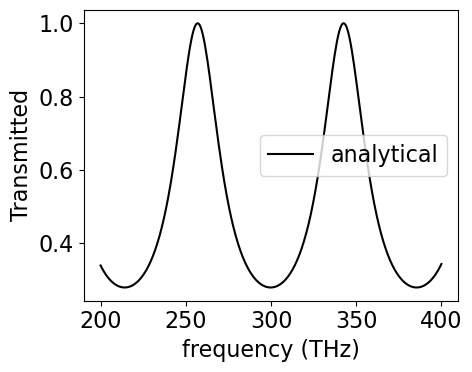

In [12]:
def slab_analytical(d, n, wvl):
    """ computes transmision as a function of slab thickness (d), refractive index (n), and wavelength (wvl). """
    rho = (n-1)/(n+1)
    t = ((1+rho)*(1-rho)*np.exp(-2j*np.pi*n*d/wvl)) / (1 - rho**2*np.exp(-4j*np.pi*n*d/wvl))
    return np.abs(t)**2

transmission_analytical = slab_analytical(t_slab, n_slab, monitor_lambdas)
fig, ax = plt.subplots(1,figsize=(5,4), tight_layout=True)
ax.plot(monitor_freqs / 1e12, transmission_analytical, 'k', label='analytical')
ax.set_xlabel('frequency (THz)')
ax.set_ylabel('Transmitted')
ax.legend()
plt.show()

In [13]:
slab = td.Structure(
    geometry=td.Box(
        center=(0, 0, -Lz/2 + spacing + t_slab/2),
        size=(td.inf, td.inf, t_slab),
    ),
    medium=mat_slab,
    name='slab',
)

# Here we define the planewave source, placed just in advance (towards negative z) of the slab
source = td.PlaneWave(
    source_time = td.GaussianPulse(
        freq0=freq0,
        fwidth=freqw
    ),
    size=(td.inf, td.inf, 0),
    center=(0, 0, -Lz/2+spacing/2),
    direction='+',
    pol_angle=0,
    name='planewave',
)

# We are interested in measuring the transmitted flux, so we set it to be an oversized plane.
monitor = td.FluxMonitor(
    center = (0, 0, Lz/2 - spacing/2),
    size = (td.inf, td.inf, 0),
    freqs = monitor_freqs,
    name='flux',
)

In [14]:
# simulation with default 12 PML layers
pml = td.Boundary.pml()
bspec = td.BoundarySpec(x=td.Boundary.periodic(), y = td.Boundary.periodic(), z=pml)
sim_default = td.Simulation(
    center = (0, 0, 0),
    size = sim_size,
    grid_spec = td.GridSpec.uniform(dl=dl),
    structures = [slab],
    sources = [source],
    monitors = [monitor],
    run_time = t_stop,
    boundary_spec = bspec,
)

# simulation with only 2 PML layers
pml_2layer = td.Boundary.pml(num_layers=2)
bspec_2layer = td.BoundarySpec(x=td.Boundary.periodic(), y = td.Boundary.periodic(), z=pml_2layer)
sim_2layer = sim_default.copy(update={'boundary_spec':bspec_2layer})

In [15]:
sim_FP_data = web.run(sim_default, task_name='lecture06_FP_default_PML', path=f'data/data_FP_default.hdf5')
sim_FP_2layer_data = web.run(sim_2layer, task_name='lecture06_FP_2PMLlayer', path=f'data/data_FP_2layer.hdf5')

[15:50:17] Created task 'lecture06_FP_default_PML' with task_id                                       ]8;id=938601;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=564149;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#189\189]8;;\
           'fdve-3091f207-7b1c-460b-b7b7-5fa7143aafe5v1'.                                                          

           View task using web UI at                                                                  ]8;id=45435;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=460355;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#191\191]8;;\
           ]8;id=859805;https://tidy3d.simulation.cloud/workbench?taskId=fdve-3091f207-7b1c-460b-b7b7-5fa7143aafe5v1\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=286647;https://tidy3d.simulation.cloud/workbench?taskId=fdve-3091f207-7b1c-460b-b7b7-5fa7143aafe5v1\taskId]8;;\]8;id=859805;https://tidy3d.simulation.cloud/workbench?taskId=fdve-3091f207-7b1c-460b-b7b7-5fa7143aafe5v1\=]8;;\]8;id=66771;https://tidy3d.simulation.cloud/workbench?taskId=fdve-3091f207-7b1c-460b-b7b7-5fa7143aafe5v1\fdve]8;;\]8;id=859805;https://tidy3d.simulation.cloud/workbench?taskId=fdve-3091f207-7b1c-460b-b7b7-5fa7143aafe5v1\-3091f207-7b1c-460b-b7b7-5fa7143aafe]8;;\              
           ]8;id=859805;https://tidy3d.simulation.cloud/workbench?taskId=fdve-3091f207-7b1c-460b-b7b7-5fa7143aafe5v1\5v1']8;;\.                                                                                                   

Output()

[15:50:20] status = queued                                                                            ]8;id=273231;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=235296;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#363\363]8;;\

Output()

[15:50:24] status = preprocess                                                                        ]8;id=421210;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=667922;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#357\357]8;;\

[15:50:29] Maximum FlexCredit cost: 0.025. Use 'web.real_cost(task_id)' to get the billed FlexCredit  ]8;id=335061;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=457239;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#343\343]8;;\
           cost after a simulation run.                                                                            

           starting up solver                                                                         ]8;id=614721;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=829460;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#379\379]8;;\

           running solver                                                                             ]8;id=655090;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=103993;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#389\389]8;;\

           To cancel the simulation, use 'web.delete(task_id)' or delete the task in the web UI.      ]8;id=401129;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=264749;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#390\390]8;;\
           Terminating the Python script will not stop the job running on the cloud.                               

Output()

[15:50:37] early shutoff detected, exiting.                                                           ]8;id=844262;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=887116;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#407\407]8;;\

           status = postprocess                                                                       ]8;id=996821;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=428169;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#424\424]8;;\

Output()

[15:50:41] status = success                                                                           ]8;id=433069;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=838905;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#431\431]8;;\

Output()

[15:50:44] loading SimulationData from data/data_FP_default.hdf5                                      ]8;id=416491;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=914427;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#609\609]8;;\

[15:50:44] Created task 'lecture06_FP_2PMLlayer' with task_id                                         ]8;id=716546;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=366621;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#189\189]8;;\
           'fdve-f90791e7-037b-4876-936f-e11ea15df73cv1'.                                                          

           View task using web UI at                                                                  ]8;id=180550;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=804825;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#191\191]8;;\
           ]8;id=764342;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f90791e7-037b-4876-936f-e11ea15df73cv1\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=79727;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f90791e7-037b-4876-936f-e11ea15df73cv1\taskId]8;;\]8;id=764342;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f90791e7-037b-4876-936f-e11ea15df73cv1\=]8;;\]8;id=479970;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f90791e7-037b-4876-936f-e11ea15df73cv1\fdve]8;;\]8;id=764342;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f90791e7-037b-4876-936f-e11ea15df73cv1\-f90791e7-037b-4876-936f-e11ea15df73]8;;\              
           ]8;id=764342;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f90791e7-037b-4876-936f-e11ea15df73cv1\cv1']8;;\.                                                                                                   

Output()

[15:50:46] status = queued                                                                            ]8;id=301596;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=810314;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#363\363]8;;\

Output()

[15:50:50] status = preprocess                                                                        ]8;id=493908;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=450659;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#357\357]8;;\

[15:50:54] Maximum FlexCredit cost: 0.025. Use 'web.real_cost(task_id)' to get the billed FlexCredit  ]8;id=2138;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=899341;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#343\343]8;;\
           cost after a simulation run.                                                                            

           starting up solver                                                                         ]8;id=225986;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=419805;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#379\379]8;;\

           running solver                                                                             ]8;id=131327;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=315213;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#389\389]8;;\

           To cancel the simulation, use 'web.delete(task_id)' or delete the task in the web UI.      ]8;id=938536;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=549409;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#390\390]8;;\
           Terminating the Python script will not stop the job running on the cloud.                               

Output()

[15:51:15] early shutoff detected, exiting.                                                           ]8;id=427994;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=510816;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#407\407]8;;\

           status = postprocess                                                                       ]8;id=940035;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=609542;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#424\424]8;;\

Output()

[15:51:19] status = success                                                                           ]8;id=936533;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=451859;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#431\431]8;;\

Output()

[15:51:22] loading SimulationData from data/data_FP_2layer.hdf5                                       ]8;id=561217;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=238401;file://C:\Users\oarisev\AppData\Local\miniconda3\envs\tidy3d\Lib\site-packages\tidy3d\web\webapi.py#609\609]8;;\

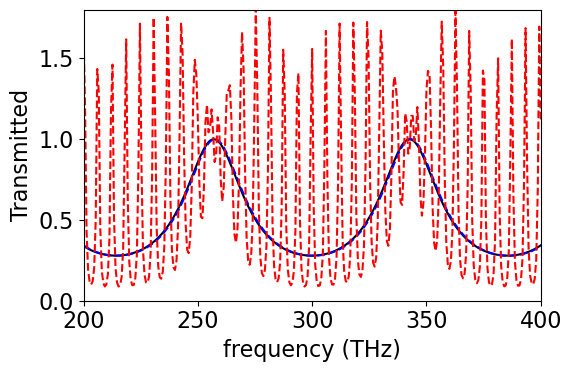

In [16]:
fig, ax = plt.subplots(1,figsize=(6,4), tight_layout=True)

transmission_default = sim_FP_data['flux'].flux
transmission_2layer = sim_FP_2layer_data['flux'].flux

ax.plot(monitor_freqs/1e12, transmission_analytical, 'k', label='analytical')
ax.plot(monitor_freqs/1e12, transmission_default, 'b--', label='default')
ax.plot(monitor_freqs/1e12, transmission_2layer, 'r--', label='2layer')
ax.set_xlabel('frequency (THz)')
ax.set_xlim([200, 400])
ax.set_ylim(0,1.8)
ax.set_ylabel('Transmitted')
plt.show()